# **Import Libraries and modules**

MNIST - Using DNN

- In the following, i tried to achieve Testing/Evaluation accuracy of atleast 99% using the Deep Neural Network.
- Below is the network that achieved 99% accuracy
- Trails which i attempted are listed in the Trails section

In [1]:
# https://keras.io/
!pip install -q keras

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
print(keras.__version__)

2.2.2


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print (X_train.shape)

(60000, 28, 28)


Text(0.5,1,'3')

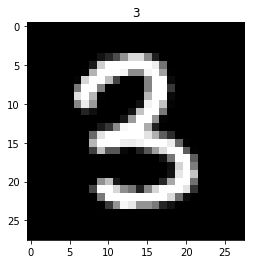

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

random_value = np.random.randint(low=0, high=len(X_train), dtype='int64')

plt.imshow(X_train[random_value], cmap='gray')
plt.title(y_train[random_value])

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Below is the model which achieved 99% accuracy on the Test data

In [14]:
from keras.layers import Activation
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) #26
model.add(Conv2D(64, (3, 3), activation='relu')) #24
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')) #12
model.add(Conv2D(128, (3, 3))) # 10
model.add(Conv2D(256, (3, 3))) # 8
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')) #4
model.add(Conv2D(10, (1, 1), activation='relu'))
model.add(Conv2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 10)          2570      
__________

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.1557 - acc: 0.9507
Epoch 2/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0588 - acc: 0.9817
Epoch 3/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0465 - acc: 0.9854
Epoch 4/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0374 - acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0333 - acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0295 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 41s 687us/step - loss: 0.0261 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 41s 685us/step - loss: 0.0246 - acc: 0.9920
Epoch 9/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0227 - acc: 0.9931
Epoch 10/10
60000/60000 [==============================] - 41s 685us/step - loss: 

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04624181559107301, 0.9882]


In [19]:
print(score)

[0.04624181559107301, 0.9882]


In [20]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[1.22574921e-15 1.96117248e-14 8.35229780e-13 6.81871282e-10
  1.46564998e-20 1.06370347e-14 5.41326460e-26 1.00000000e+00
  5.48366970e-15 2.33612392e-12]
 [1.91871796e-11 9.41511886e-12 1.00000000e+00 6.04442668e-12
  2.45480129e-20 4.01362948e-19 3.95590261e-17 1.80731473e-16
  3.70108777e-10 4.56561429e-18]
 [4.17066425e-12 9.99999881e-01 3.67599229e-10 8.40940078e-12
  1.19922674e-07 1.96592881e-10 1.42632556e-13 2.72158940e-09
  3.83576886e-11 5.81938794e-13]
 [9.99964833e-01 3.94733483e-18 7.14100494e-08 5.09637887e-10
  6.07892209e-12 3.87169097e-09 3.30893417e-05 7.21524728e-13
  1.86707371e-06 4.22204188e-10]
 [8.00109829e-14 2.46791888e-12 2.79535428e-13 5.94810027e-18
  1.00000000e+00 1.42276006e-14 2.80959180e-11 8.18415177e-15
  6.67407551e-09 5.54080185e-11]
 [1.30072017e-12 9.99999881e-01 4.55663729e-10 1.41348912e-12
  1.16373350e-07 2.34894721e-12 1.81003381e-15 1.25870461e-08
  3.72758178e-11 3.28700608e-12]
 [1.43860575e-22 1.55393559e-10 2.03147808e-14 1.48713727e

In [22]:
pred_arr = list(np.argmax(arr) for arr in y_pred[:9])

print(pred_arr)
print(y_test[:9])

[7, 2, 1, 0, 4, 1, 4, 9, 5]
[7 2 1 0 4 1 4 9 5]


In [23]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

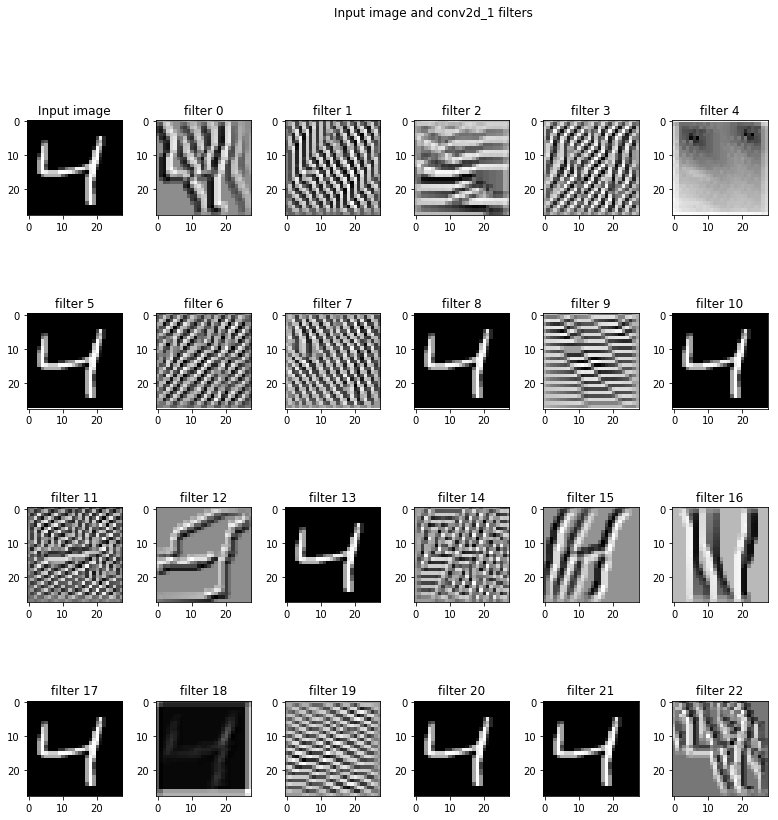

In [25]:
vis_img_in_filter(layer_name='conv2d_1')

In [26]:
# vis_img_in_filter(layer_name='conv2d_2')

# Trails

## Observations
- As per the Keras source code, Conv2D is an alias for the Convolution2D. But for the same Network architecute where Conv2D is used instead of Convolution2D; **Evaluation accuracy is more**. Unable to understand,why?

- Can observe model_1 and model_3 evaluation results

##### Trail - 1

In [27]:
from keras.layers import Activation
model_1 = Sequential()
 
model_1.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model_1.add(Convolution2D(64, 3, 3, activation='relu')) #24
model_1.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')) #12
model_1.add(Convolution2D(128, 3, 3)) # 10
model_1.add(Convolution2D(256, 3, 3)) # 8
model_1.add(Convolution2D(10, 1, 1, activation='relu'))
model_1.add(Convolution2D(10, 8))
model_1.add(Flatten())
model_1.add(Activation('softmax'))

c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  import sys
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3))`
  
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':


In [28]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 10)          2570      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)          6410      
__________

In [29]:
model_1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model_1.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.1304 - acc: 0.9595
Epoch 2/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.0561 - acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.0469 - acc: 0.9854
Epoch 4/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.0404 - acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.0362 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0315 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 40s 667us/step - loss: 0.0302 - acc: 0.9901
Epoch 8/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0263 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0252 - acc: 0.9918
Epoch 10/10
60000/60000 [==============================] - 40s 671us/step - loss: 

In [30]:
score_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print(score_1)

[0.044826604385943304, 0.9885]


##### Trail - 2
- With Conv2D

In [31]:
from keras.layers import Activation
model_3 = Sequential()

model_3.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) #26
model_3.add(Conv2D(64, (3,3),activation='relu')) # 24
model_3.add(MaxPooling2D()) #12
model_3.add(Conv2D(128, (3,3), activation='relu')) #10
model_3.add(Conv2D(256, (3,3), activation='relu', padding='valid')) # 8
model_3.add(Conv2D(10,1, activation='relu'))
model_3.add(Conv2D(10,8))
model_3.add(Flatten())
model_3.add(Activation('softmax'))

In [32]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 10)          2570      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 10)          6410      
__________

In [33]:
model_3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [34]:
model_3.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.1329 - acc: 0.9584
Epoch 2/10
60000/60000 [==============================] - 41s 685us/step - loss: 0.0486 - acc: 0.9855
Epoch 3/10
60000/60000 [==============================] - 41s 685us/step - loss: 0.0343 - acc: 0.9891
Epoch 4/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0269 - acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0206 - acc: 0.9935
Epoch 6/10
60000/60000 [==============================] - 41s 685us/step - loss: 0.0174 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0154 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0124 - acc: 0.9960
Epoch 9/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0112 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 41s 683us/step - loss: 

In [35]:
score_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print(score_3)

[0.028622790005646312, 0.9918]


##### Trail - 3

In [36]:
from keras.layers import Activation
model_4 = Sequential()

model_4.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_4.add(Conv2D(64, (3,3),activation='relu'))
model_4.add(MaxPooling2D())
model_4.add(Conv2D(128, (3,3), activation='relu'))
model_4.add(Conv2D(10,1, activation='relu'))
model_4.add(Conv2D(10,10))
model_4.add(Flatten())
model_4.add(Activation('softmax'))

In [37]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 10)        1290      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
__________

In [38]:
model_4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
model_4.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 31s 515us/step - loss: 0.1353 - acc: 0.9578
Epoch 2/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0482 - acc: 0.9850
Epoch 3/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0360 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0278 - acc: 0.9909
Epoch 5/10
60000/60000 [==============================] - 30s 498us/step - loss: 0.0230 - acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0185 - acc: 0.9940
Epoch 7/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0152 - acc: 0.9947
Epoch 8/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0124 - acc: 0.9960
Epoch 9/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0112 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 30s 497us/step - loss: 

In [40]:
score_4 = model_4.evaluate(X_test, Y_test, verbose=0)
print(score_4)

[0.02959476177810229, 0.9917]


##### Trail - 4

In [41]:
from keras.layers import Activation
model_5 = Sequential()
 
model_5.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model_5.add(Convolution2D(64, 3, 3, activation='relu')) #24
model_5.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')) #12
model_5.add(Convolution2D(64, 3, 3)) # 10
model_5.add(Convolution2D(128, 3, 3)) # 8
model_5.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')) #4
# model_5.add(Convolution2D(10, 1, 1, activation='relu'))
model_5.add(Convolution2D(10, 4))
model_5.add(Flatten())
model_5.add(Activation('softmax'))

c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  import sys
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  


In [42]:
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 1, 1, 10)          20490     
__________

In [43]:
model_5.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [44]:
model_5.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.1231 - acc: 0.9617
Epoch 2/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.0519 - acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.0402 - acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.0345 - acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 32s 525us/step - loss: 0.0288 - acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.0244 - acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.0211 - acc: 0.9930
Epoch 8/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0198 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 32s 525us/step - loss: 0.0174 - acc: 0.9944
Epoch 10/10
60000/60000 [==============================] - 32s 526us/step - loss: 

In [45]:
score_5 = model_5.evaluate(X_test, Y_test, verbose=0)
print(score_5)

[0.04269996428527675, 0.9907]
